# Імпорт модулів

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Зчитуємо таблиці і шукаєио необхідну

In [7]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'  
table = pd.read_html(url, match="Коефіцієнт народжуваності [у|в] регіонах України .*")

In [8]:
df = pd.DataFrame(table[0])

## 1. Вивести перші рядки таблиці за допомогою методу head

In [9]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


## 2. Визначте кількість рядків та стовпців у датафреймі

In [10]:
num_rows, num_columns = df.shape

print(f"Кількість рядків: {num_rows}")
print(f"Кількість стовбців: {num_columns}")

Кількість рядків: 28
Кількість стовбців: 9


## 3. Замініть у таблиці значення "—" на значення NaN

In [11]:
df.replace("—", np.nan, inplace=True)

## 4. Визначте типи всіх стовпців за допомогою `dataframe.dtypes`

In [12]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

## 5. Замініть типи нечислових колонок на числові.

## 6. Порахуйте, яка частка пропусків міститься в кожній колонці

In [13]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

In [14]:
missing_percentage

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64

## 7. Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [15]:
df.drop(df.index[-1], inplace=True)
df.tail()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
22,Черкаська,205.0,179.0,144.0,123,75,100,98,64
23,Чернівецька,247.0,218.0,170.0,148,101,128,129,92
24,Чернігівська,220.0,183.0,127.0,108,69,94,90,61
25,Київ,NaN,174.0,159.0,120,73,120,121,110
26,Севастополь,NaN,NaN,NaN,125,70,120,NaN,NaN


## 8. Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [39]:
df.drop('Регіон', axis=1).mean(numeric_only=True).round(2)

1950    231.04
1960    207.58
1970    156.00
1990    130.59
2000     82.22
2012    116.56
dtype: float64

In [40]:
df.fillna(_, inplace=True)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.00,206.000000,160.0,130,73,126,153.997882,153.997882
1,Вінницька,224.00,192.000000,142.0,124,84,112,109,76
2,Волинська,247.00,250.000000,179.0,153,112,148,141,101
3,Дніпропетровська,204.00,204.000000,151.0,123,71,112,111,71
4,Донецька,271.00,214.000000,140.0,109,61,98,82,153.997882
5,Житомирська,261.00,223.000000,159.0,129,89,122,120,79
6,Закарпатська,314.00,273.000000,207.0,168,115,151,146,104
7,Запорізька,219.00,197.000000,150.0,124,71,106,106,68
8,Івано-Франківська,243.00,248.000000,182.0,155,103,124,122,88
9,Київська,204.00,189.000000,156.0,123,73,122,121,80


## 9. Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [53]:
YEAR = '2019'
COL_NAME = 'Регіон'
df[YEAR].mean()


# df[condition][COL_NAME].tolist()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U2')) -> None

## 10. У якому регіоні була найвища народжуваність у 2014 році?

In [ ]:
df.loc[df[YEAR].idxmax(), COL_NAME]

'Рівненська область'

## 11. Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

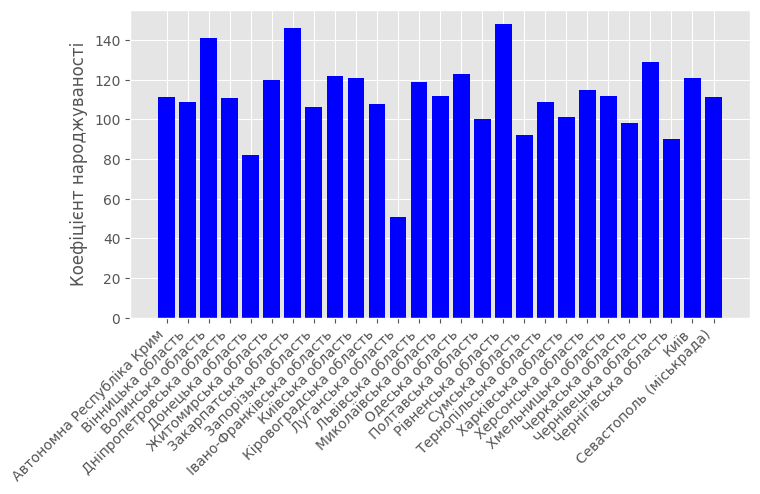

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 4)) 
plt.bar(df[COL_NAME], df[YEAR], color='b')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Коефіцієнт народжуваності')
plt.show()